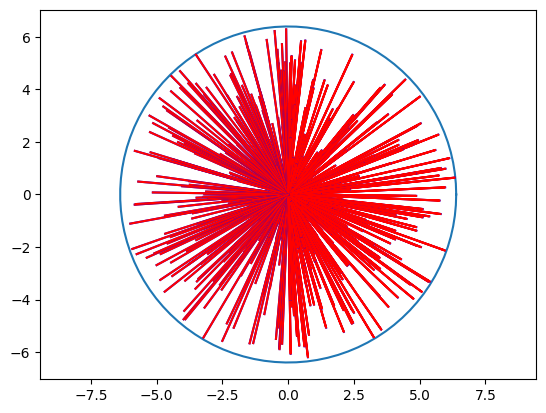

Drone 0 positions and times:
Position: (0), Time: 0 minutes
Position: (0.013333333333333334), Time: 0.016666666666666666 minutes
Position: (0.026805555555555555), Time: 0.03333333333333333 minutes
Position: (0.04041666666666666), Time: 0.05 minutes
Position: (0.05416666666666666), Time: 0.06666666666666667 minutes
Position: (0.06805555555555555), Time: 0.08333333333333333 minutes
Position: (0.08208333333333333), Time: 0.09999999999999999 minutes
Position: (0.09624999999999999), Time: 0.11666666666666665 minutes
Position: (0.11055555555555555), Time: 0.13333333333333333 minutes
Position: (0.12499999999999999), Time: 0.15 minutes
Position: (0.1395833333333333), Time: 0.16666666666666666 minutes
Position: (0.15430555555555553), Time: 0.18333333333333332 minutes
Position: (0.16916666666666663), Time: 0.19999999999999998 minutes
Position: (0.18416666666666662), Time: 0.21666666666666665 minutes
Position: (0.1993055555555555), Time: 0.2333333333333333 minutes
Position: (0.2145833333333333), 

In [2]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import itertools
%matplotlib inline

pi = 3.141592653

center_x = 0
center_y = 0

############# GRAPH ################
theta = np.linspace(0, 2*np.pi, 100)
r = 6.3905
x = r * np.cos(theta)
y = r * np.sin(theta)
z = 0
m = 0
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(m, z, marker="o", markersize=3, markeredgecolor="blue", markerfacecolor="blue")
ax.axis('equal')
####################################


class Drone:


    id_iter = itertools.count()

    def __init__(self, r, theta):
        self.r = r
        self.id = next(Drone.id_iter)
        self.distance = []
        self.theta = theta
        self.positions = []
        self.times = []

    def collisioncheck(self, other_drone):
        for pos_self in self.positions:
            for pos_other in other_drone.positions:
                distance = math.sqrt((pos_self[0] - pos_other[0])**2 + (pos_self[1] - pos_other[1])**2)
                if distance < 1:
                    if r < 1:
                        return True
                    else: 
                        return False
                else:
                    return False 

    def dronedeliver(self):
        distance = self.r
        r0 = 0
        v0 = 0.8
        dt = 1 / 60
        t = 0

        r = r0
        v = v0

        while r < distance:
            x = r * math.cos(self.theta)
            y = r * math.sin(self.theta)
            self.positions.append((x, y))
            self.times.append(t)
            self.distance.append(r)

            r_new = r + v * dt
            v_new = v + 0.5 * dt
            r = r_new
            v = v_new
            t += dt

        ax.plot([pos[0] for pos in self.positions], [pos[1] for pos in self.positions], 'b')

    def dronereturn(self):
        v0 = 0.8
        dt = 1 / 60
        t = self.times[-1]

        r = self.positions[-1][0]
        
        v = -v0
        v_new = v + 0.5 * dt

        while r > 0: 
            x = r * math.cos(self.theta)
            y = r * math.sin(self.theta)
            self.positions.append((x, y))
            self.times.append(t)
            self.distance.append(r)

            r_new = r + v_new * dt
            r = r_new
            v = v_new
            t += dt

        ax.plot([pos[0] for pos in self.positions], [pos[1] for pos in self.positions], 'r')


drones = []

for i in range(500):
    r = random.uniform(0, 6.3905)
    theta = random.uniform(0, (2 * pi))
    drone = Drone(r, theta)

    

    drone.dronedeliver()
    drone.dronereturn()

    drones.append(drone)
    collided = False

    



# Plot the Graph
plt.show()

# Print drone positions and times for each drone
for i, drone in enumerate(drones):
    for prev_drone in drones[:-1]:
        if drone.collisioncheck(prev_drone) == True:
            collided = True
        else:
            collided = False
    print(f"Drone {drone.id} positions and times:")
    for distance, t in zip(drone.distance, drone.times):
        if collided == True:
            print(f"Drone {drone.id} collided.")
            break
        else:
            print(f"Position: ({distance}), Time: {t} minutes")
